In [2]:
import h5py
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import math 

In [3]:
file_path = '../results/high_gremline_mask_100_outward_wbos_eos.hdf5'

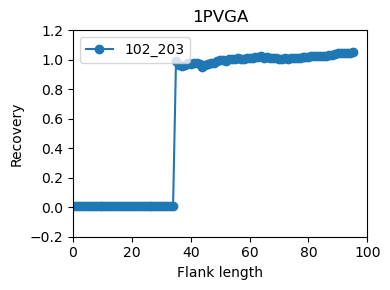

In [7]:
# Initialize a dictionary to store sum_mult for each protein, flank_len and position
protein_to_position_to_flank_len_to_values = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# Load the hdf5 file
with h5py.File(file_path, 'r') as f:
    protein_name = '1PVGA' 
    positions = list(f[protein_name].keys())

    for position in positions:
        flank_lens = list(f[f"{protein_name}/{position}"].keys())
        flank_len_values = [int(fl.split('/')[0]) for fl in flank_lens]  # get flank lengths as integers

        # Collect sum_mult for each flank_len and position
        for fl, fl_value in zip(flank_lens, flank_len_values):
            sum_mult = f[f"{protein_name}/{position}/{fl}/sum_mult"][()]
            protein_to_position_to_flank_len_to_values[protein_name][position][fl_value].append(sum_mult)



# Calculate the number of rows needed for the subplots
n = len(protein_to_position_to_flank_len_to_values)
n_cols = 6
n_rows = math.ceil(n / n_cols)

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Flatten axs for easy iteration
axs = axs.flatten()

for i, (protein_name, position_to_flank_len_to_values) in enumerate(protein_to_position_to_flank_len_to_values.items()):
    for position, flank_len_to_values in position_to_flank_len_to_values.items():
        # Prepare data for plotting
        flank_lengths = sorted(flank_len_to_values.keys())
        sum_mult_values = [value for fl in flank_lengths for value in flank_len_to_values[fl]]  # Flatten list

        # Plot the data points connected by lines
        axs[i].plot([fl for fl in flank_lengths for _ in flank_len_to_values[fl]],  # Repeat each normalized flank length for the number of corresponding sum_mult values
                 sum_mult_values, marker='o', label=str(int(position.split('_')[0]) + 1) + '_' + str(int(position.split('_')[1]) + 1))

    axs[i].set_title(protein_name)
    axs[i].set_xlabel('Flank length')
    axs[i].set_ylabel('Recovery')
    axs[i].set_xlim(0, 100)
    axs[i].set_ylim(-0.2, 1.2)
    axs[i].legend(loc='upper left')

# Delete unused subplots
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
#plt.title(name)
#plt.savefig(file_path.split('.')[0] + '.jpg')
plt.savefig('figures_manuscript/' + protein_name + '_recovery.svg')
plt.show()